In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start , end)

[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-29,3.155672,3.362895,3.143966,3.264763,3.256765,613229953
2004-09-30,3.235373,3.295149,3.212957,3.227901,3.219993,276468402
2004-10-01,3.257789,3.343468,3.210466,3.302123,3.294034,303934969
2004-10-04,3.368624,3.408972,3.338237,3.363891,3.355650,261693228
2004-10-05,3.353929,3.450317,3.293655,3.446332,3.437889,300887589


In [5]:
google_data.shape

(5034, 6)

In [6]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,46.470779,46.959999,46.006073,46.490165,46.379872,1.143822e+08
std,44.468757,44.957464,44.032026,44.496459,44.397442,1.491908e+08
min,3.155672,3.295149,3.143966,3.227901,3.219993,1.584340e+05
25%,13.143797,13.273560,13.008367,13.133834,13.101659,2.702650e+07
50%,27.404117,27.610196,27.105830,27.383319,27.316236,5.351100e+07
75%,61.378876,61.949123,60.745374,61.294874,61.144712,1.396706e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-29 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [8]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of google data')

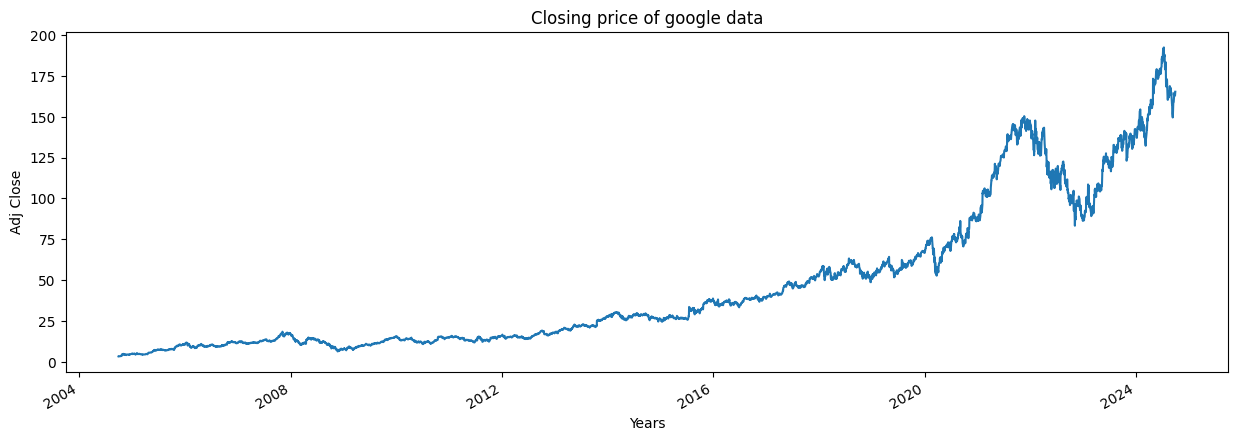

In [10]:
plt.figure(figsize= (15,5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of google data")

In [11]:
def plot_graph(figsize,values, column_name):
    plt.figure()
    values.plot(figsize= figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data")

In [12]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

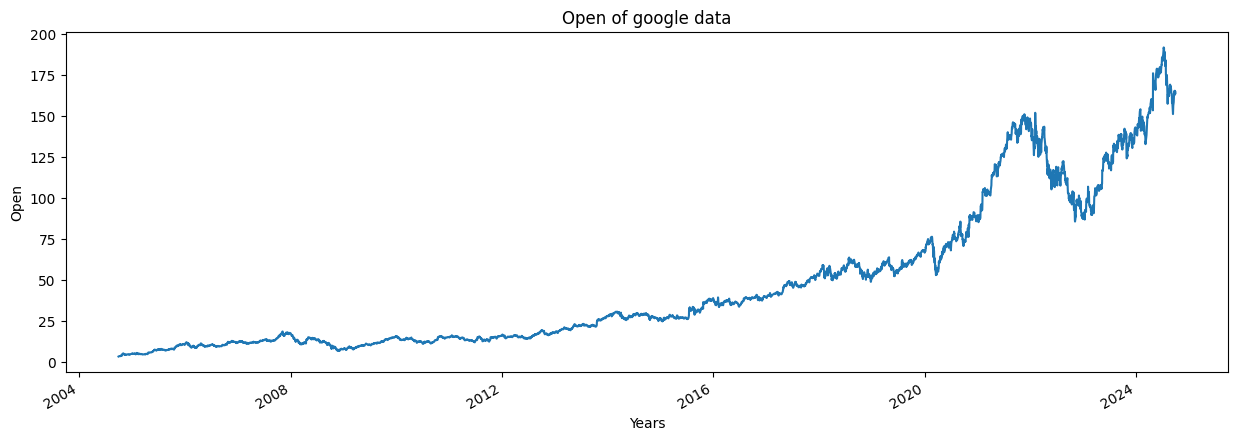

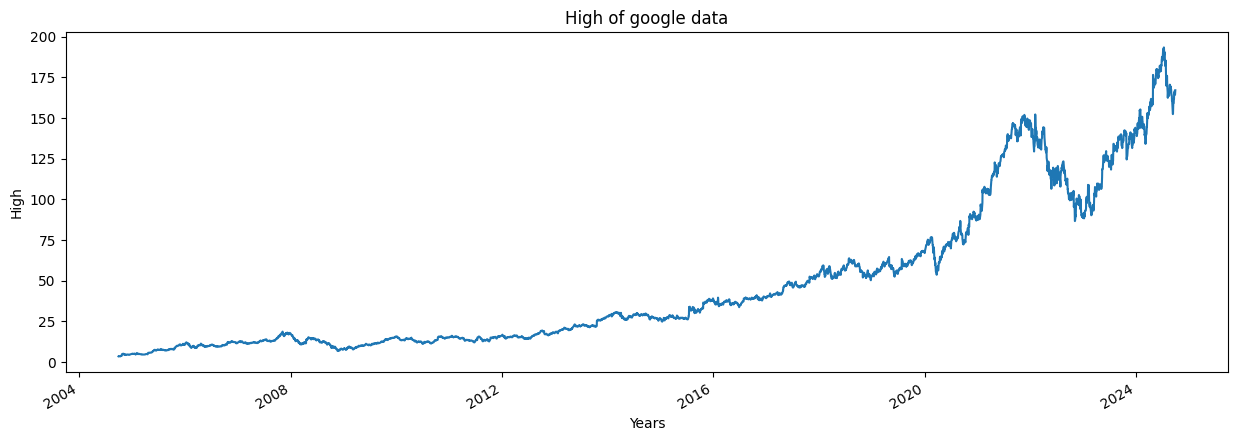

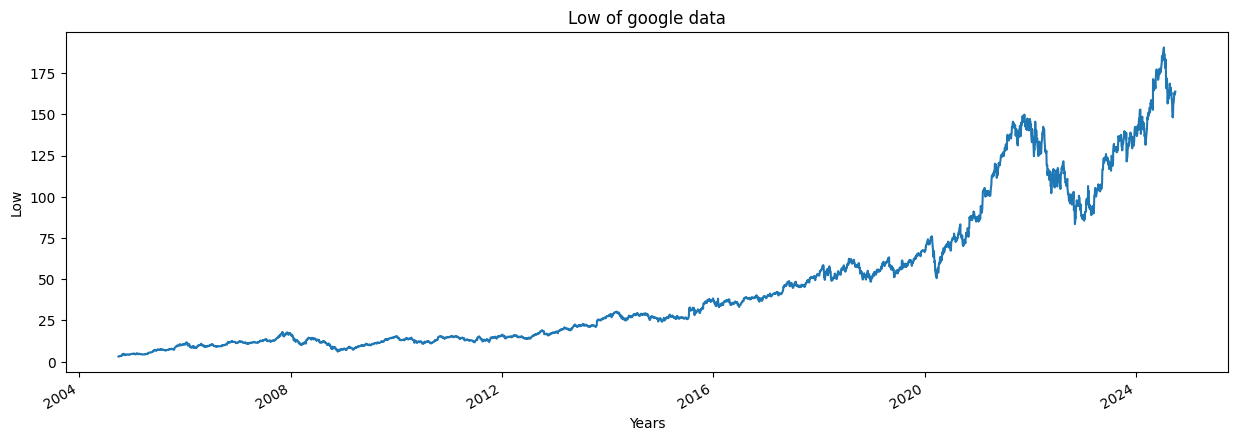

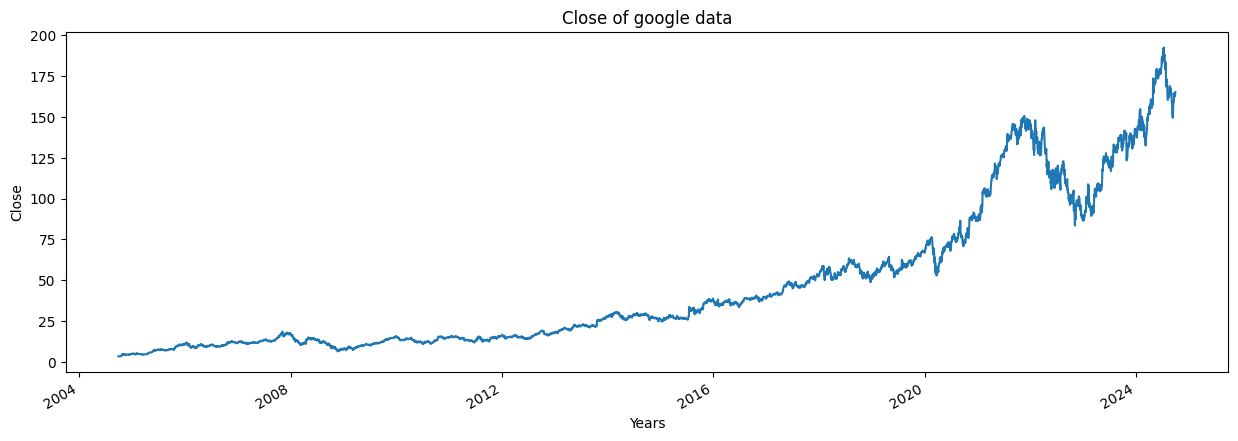

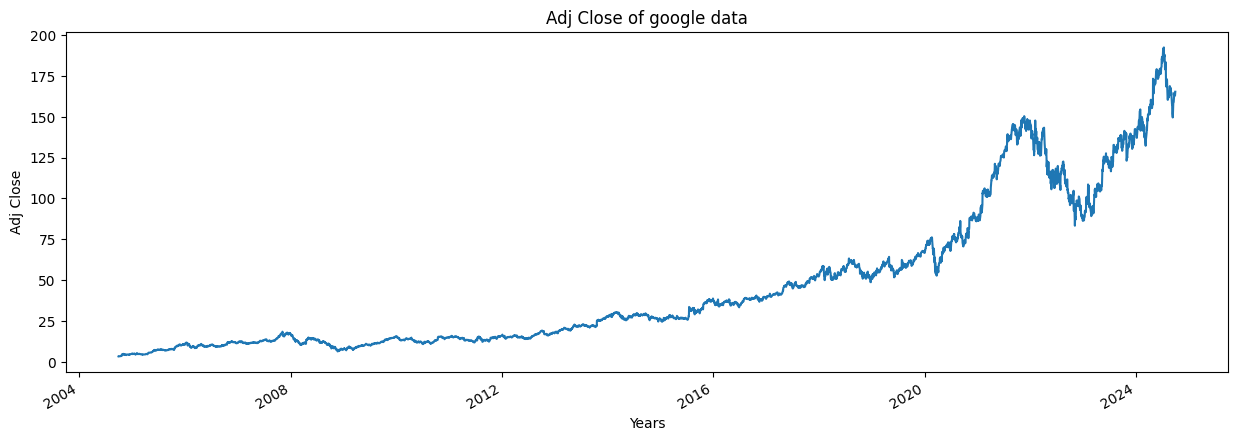

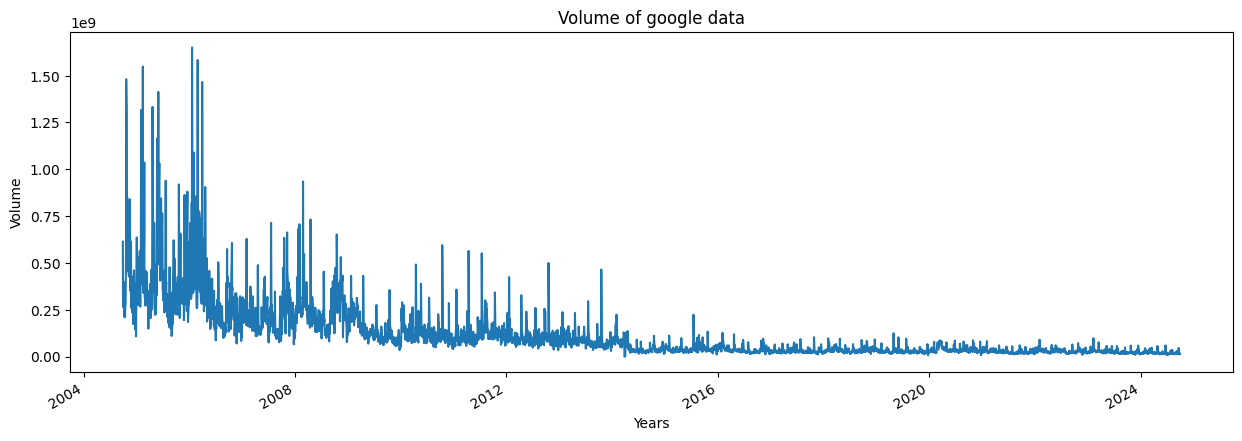

In [13]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [14]:
import pandas as pd

In [15]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 66
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 187


In [16]:
google_data['Moving average 250 days'] = google_data['Adj Close'].rolling(250).mean()
google_data['Moving average 250 days']

Date
2004-09-29           NaN
2004-09-30           NaN
2004-10-01           NaN
2004-10-04           NaN
2004-10-05           NaN
                 ...    
2024-09-23    154.105789
2024-09-24    154.243818
2024-09-25    154.371226
2024-09-26    154.495331
2024-09-27    154.630383
Name: Moving average 250 days, Length: 5034, dtype: float64

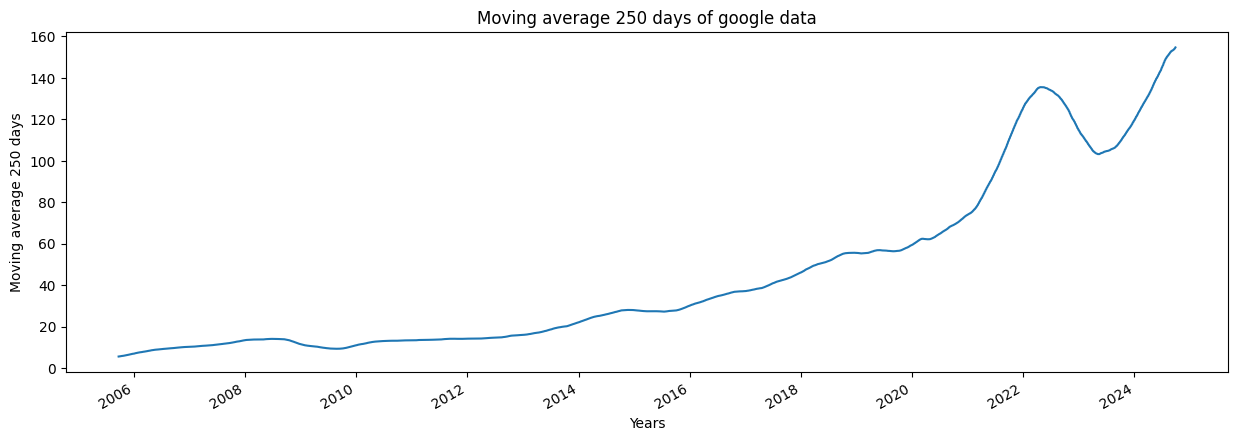

In [17]:
plot_graph((15,5),google_data['Moving average 250 days'],'Moving average 250 days')

<Figure size 640x480 with 0 Axes>

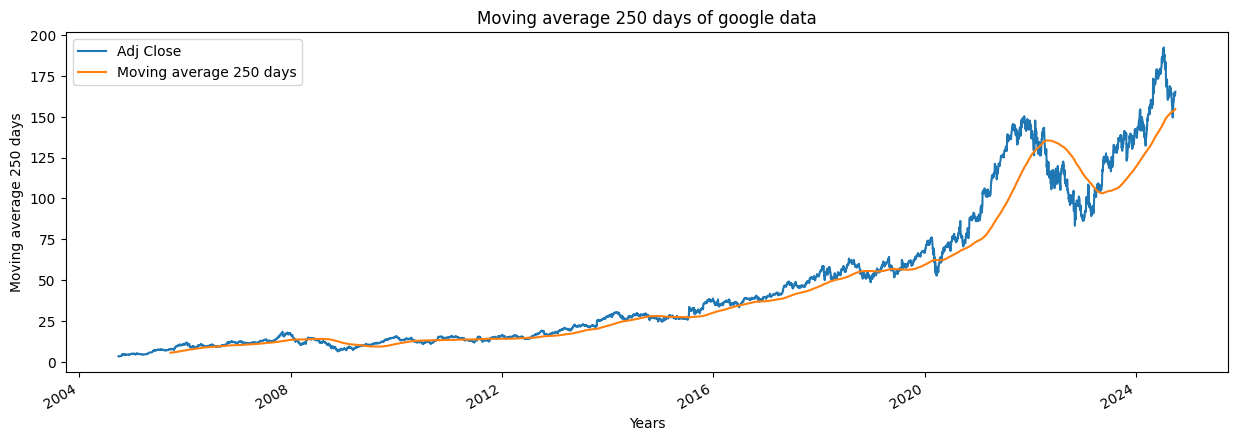

In [18]:
plot_graph((15,5),google_data[['Adj Close','Moving average 250 days']],'Moving average 250 days')

<Figure size 640x480 with 0 Axes>

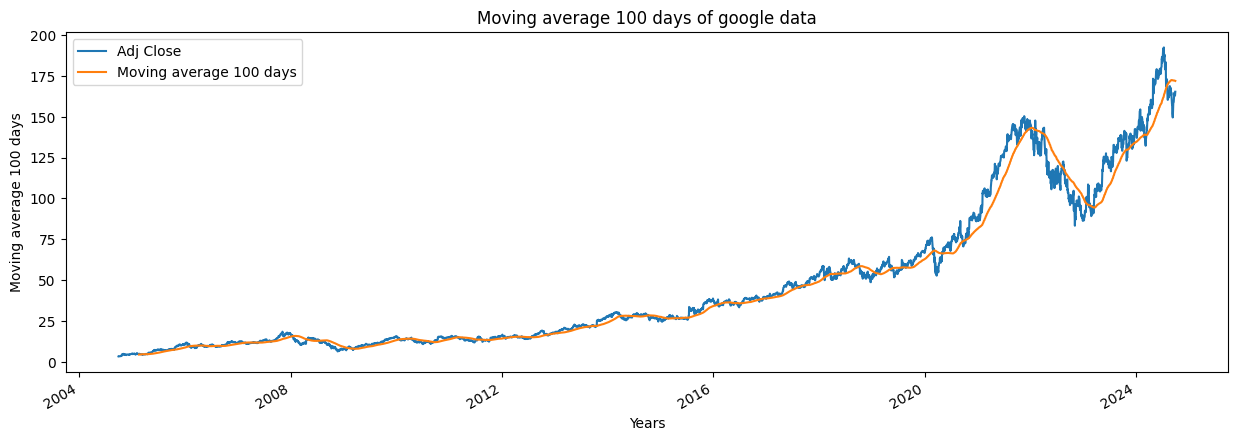

In [19]:
google_data['Moving average 100 days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','Moving average 100 days']],'Moving average 100 days')

<Figure size 640x480 with 0 Axes>

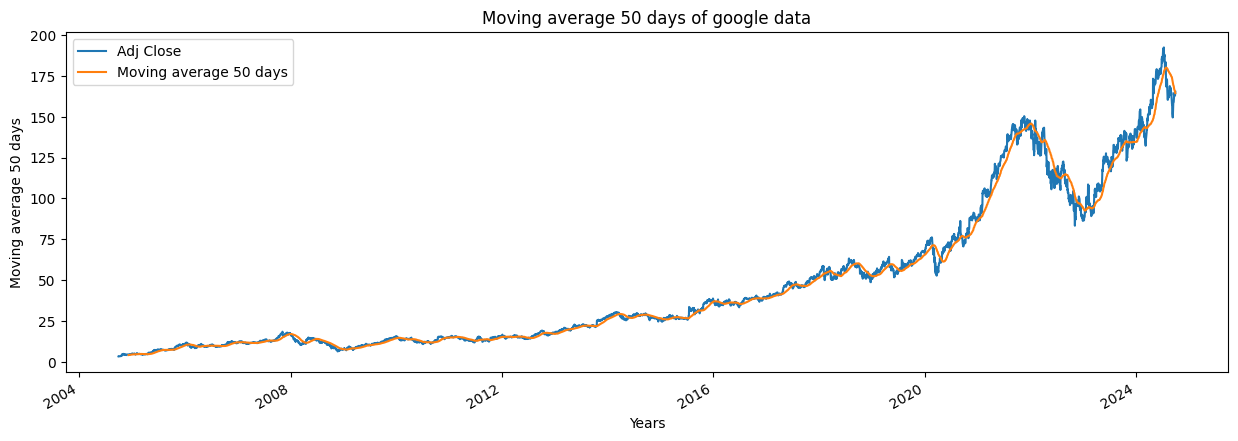

In [20]:
google_data['Moving average 50 days'] = google_data['Adj Close'].rolling(50).mean()
plot_graph((15,5),google_data[['Adj Close','Moving average 50 days']],'Moving average 50 days')

<Figure size 640x480 with 0 Axes>

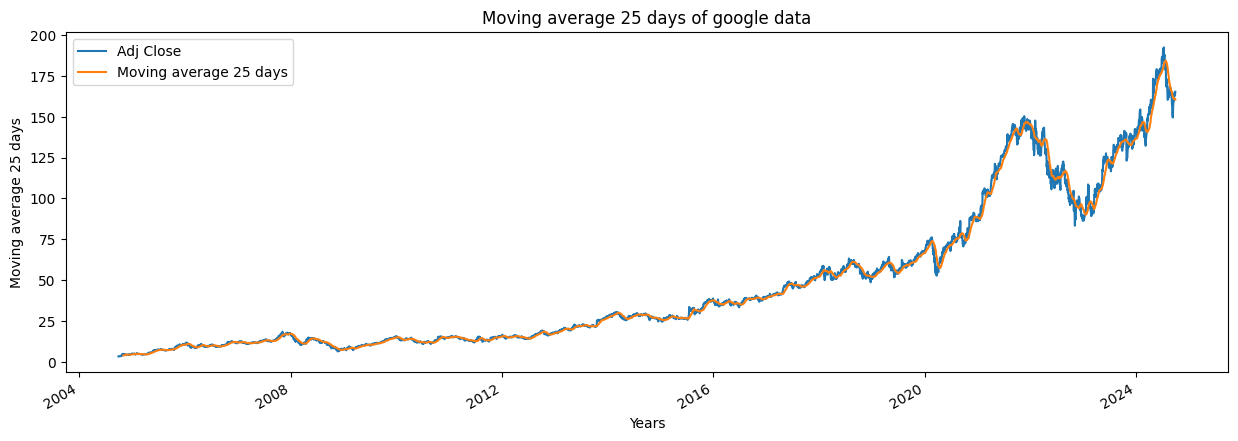

In [21]:
google_data['Moving average 25 days'] = google_data['Adj Close'].rolling(25).mean()
plot_graph((15,5),google_data[['Adj Close','Moving average 25 days']],'Moving average 25 days')

In [22]:
google_data['perecentage_cp'] = google_data['Adj Close'].pct_change()
google_data['perecentage_cp']

Date
2004-09-29         NaN
2004-09-30   -0.011291
2004-10-01    0.022994
2004-10-04    0.018706
2004-10-05    0.024508
                ...   
2024-09-23   -0.009536
2024-09-24    0.003495
2024-09-25   -0.003972
2024-09-26    0.005154
2024-09-27    0.008912
Name: perecentage_cp, Length: 5034, dtype: float64

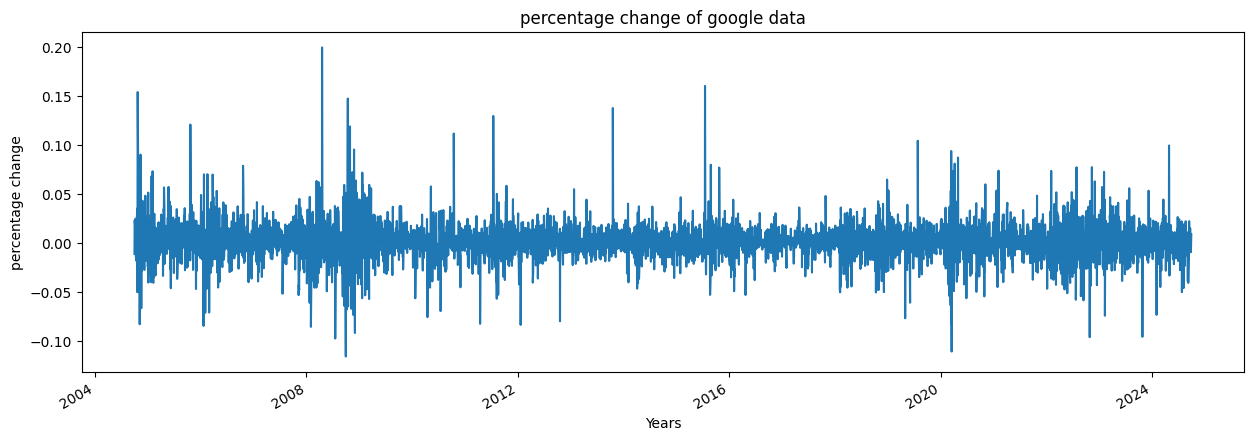

In [23]:
plot_graph((15,5),google_data['perecentage_cp'],'percentage change')

In [24]:
Adjusted_Closed_Price = google_data['Adj Close']
Adjusted_Closed_Price_df = Adjusted_Closed_Price.to_frame()


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adjusted_Closed_Price_df)
scaled_data


array([[1.94368880e-04],
       [0.00000000e+00],
       [3.91361556e-04],
       ...,
       [8.44509615e-01],
       [8.48949653e-01],
       [8.56666851e-01]])

In [27]:
len(scaled_data)

5034

In [28]:
x_data = []
y_data = []

for i in range(25,len(scaled_data)):
    x_data.append(scaled_data[i-25:i])
    y_data.append(scaled_data[i])

import numpy as np 

x_data, y_data = np.array(x_data),np.array(y_data)

In [29]:
x_data[0],y_data[0]

(array([[0.00019437],
        [0.        ],
        [0.00039136],
        [0.00071705],
        [0.00115175],
        [0.00098234],
        [0.00121479],
        [0.0010677 ],
        [0.00074332],
        [0.00102436],
        [0.00148401],
        [0.00162847],
        [0.00190558],
        [0.00256879],
        [0.00240857],
        [0.00143017],
        [0.00259768],
        [0.00562481],
        [0.00759079],
        [0.00685536],
        [0.007403  ],
        [0.00836563],
        [0.0080163 ],
        [0.00872416],
        [0.00857182]]),
 array([0.00815156]))

In [30]:
int(len(x_data)*0.7)

3506

In [32]:
5034-100-int(len(x_data)*0.7)

1428

In [33]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3506, 25, 1)
(3506, 1)
(1503, 25, 1)
(1503, 1)
